# Question 1: XOR Gate Classification

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

XOR gate truth table

In [39]:
XOR_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
XOR_labels = np.array([0, 1, 1, 0])

print("XOR Dataset:")
print("Input Data (XOR):\n", XOR_data)
print("Labels (XOR):\n", XOR_labels)

XOR Dataset:
Input Data (XOR):
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Labels (XOR):
 [0 1 1 0]


Single Layer Perceptron


Single Layer Perceptron Predictions (MCP Neuron):
Input: [0 0], Predicted: 1, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 0, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0


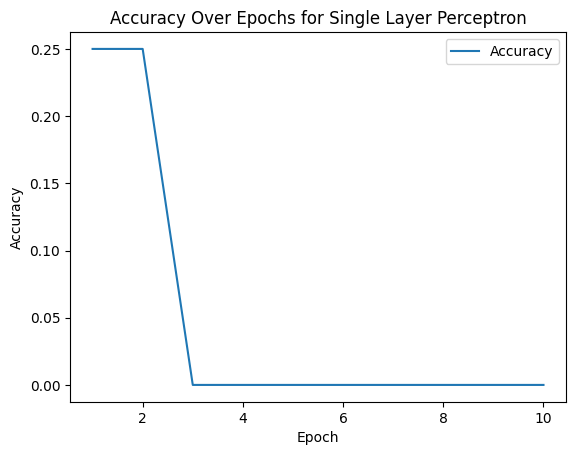

In [40]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracy_history = []

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def train(self, inputs, labels):
# Backpropagation
        for epoch in range(self.epochs):
            correct_predictions = 0

            for input, label in zip(inputs, labels):
                input = np.insert(input, 0, 1)
                weighted_sum = np.dot(input, self.weights)
                output = self.activation_function(weighted_sum)
                error = label - output
                self.weights += self.learning_rate * error * input

                if output == label:
                    correct_predictions += 1

            accuracy = correct_predictions / len(labels)
            self.accuracy_history.append(accuracy)

    def predict(self, input):
        input = np.insert(input, 0, 1)
        weighted_sum = np.dot(input, self.weights)
        return self.activation_function(weighted_sum)

# Training the SLP
slp = SingleLayerPerceptron(input_size=2, learning_rate=0.1, epochs=10)
slp.train(XOR_data, XOR_labels)

# Testing the SLP
print("\nSingle Layer Perceptron Predictions (MCP Neuron):")
for input, label in zip(XOR_data, XOR_labels):
    prediction = slp.predict(input)
    print(f"Input: {input}, Predicted: {prediction}, Actual: {label}")

# accuracy over epochs
plt.plot(range(1, slp.epochs + 1), slp.accuracy_history, label='Accuracy')
plt.title('Accuracy Over Epochs for Single Layer Perceptron')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Multi-Layer Perceptron (MLP)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Multi-Layer Perceptron Predictions:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 1
Input: [1 0], Predicted: 1
Input: [1 1], Predicted: 0


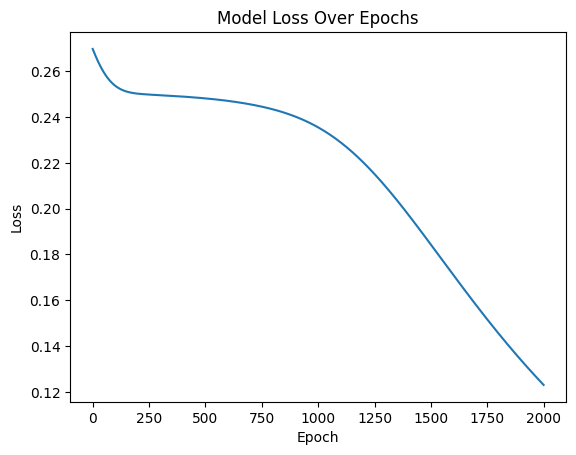

In [41]:
mlp = Sequential()

# Hidden layer with sigmoid activation function
mlp.add(Dense(4, input_dim=2, activation='sigmoid'))
mlp.add(Dense(1, activation='sigmoid'))

mlp.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Training the MLP
history = mlp.fit(XOR_data, XOR_labels, epochs=2000, verbose=0)

# Testing the MLP
mlp_predictions = mlp.predict(XOR_data)

# Displaying MLP predictions
print("\nMulti-Layer Perceptron Predictions:")
for input, prediction in zip(XOR_data, mlp_predictions):
    print(f"Input: {input}, Predicted: {round(prediction[0])}")

# Plotting the loss curve over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Question 2:
A. Sentiment Analysis Twitter Airline

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [43]:
data = pd.read_csv('/content/Tweets - Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Converting text to TF-IDF features


In [44]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['text']).toarray()

Converting sentiment labels to binary (0, 1)

In [45]:
encoder = LabelEncoder()
y = encoder.fit_transform(data['airline_sentiment'])

Splitting the dataset into training and testing datasets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Function for building the neural network

In [47]:
def build_model(activation_func='sigmoid'):
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],)))
    model.add(Activation(activation_func))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

Activation Functions

In [48]:
activations = ['sigmoid', 'relu', 'tanh']
history_dict = {}

for activation in activations:
    print(f"\nTraining with {activation} activation function\n")

    model = build_model(activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

    history_dict[activation] = history

    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"Accuracy with {activation}: ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Training with sigmoid activation function



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
366/366 - 4s - 10ms/step - accuracy: 0.4629 - loss: 0.5567 - val_accuracy: 0.5833 - val_loss: 0.4084
Epoch 2/10
366/366 - 1s - 3ms/step - accuracy: 0.6015 - loss: 0.2140 - val_accuracy: 0.5850 - val_loss: 0.0621
Epoch 3/10
366/366 - 1s - 4ms/step - accuracy: 0.6163 - loss: -1.6702e-01 - val_accuracy: 0.5973 - val_loss: -2.9378e-01
Epoch 4/10
366/366 - 1s - 3ms/step - accuracy: 0.6175 - loss: -5.9539e-01 - val_accuracy: 0.5929 - val_loss: -6.9597e-01
Epoch 5/10
366/366 - 1s - 3ms/step - accuracy: 0.6142 - loss: -1.1152e+00 - val_accuracy: 0.6066 - val_loss: -1.1947e+00
Epoch 6/10
366/366 - 1s - 4ms/step - accuracy: 0.6172 - loss: -1.7502e+00 - val_accuracy: 0.5994 - val_loss: -1.7560e+00
Epoch 7/10
366/366 - 1s - 3ms/step - accuracy: 0.6173 - loss: -2.5033e+00 - val_accuracy: 0.5997 - val_loss: -2.4202e+00
Epoch 8/10
366/366 - 1s - 3ms/step - accuracy: 0.6173 - loss: -3.3752e+00 - val_accuracy: 0.6089 - val_loss: -3.1994e+00
Epoch 9/10
366/366 - 2s - 6ms/step - accuracy: 0.62

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

366/366 - 2s - 6ms/step - accuracy: 0.6253 - loss: 0.1249 - val_accuracy: 0.6404 - val_loss: -4.6074e-01
Epoch 2/10
366/366 - 2s - 6ms/step - accuracy: 0.6243 - loss: -1.2989e+00 - val_accuracy: 0.6141 - val_loss: -1.9290e+00
Epoch 3/10
366/366 - 1s - 3ms/step - accuracy: 0.6175 - loss: -3.4926e+00 - val_accuracy: 0.6120 - val_loss: -4.1141e+00
Epoch 4/10
366/366 - 1s - 3ms/step - accuracy: 0.6191 - loss: -6.6125e+00 - val_accuracy: 0.6117 - val_loss: -7.0258e+00
Epoch 5/10
366/366 - 1s - 4ms/step - accuracy: 0.6159 - loss: -1.0614e+01 - val_accuracy: 0.6223 - val_loss: -1.0658e+01
Epoch 6/10
366/366 - 2s - 4ms/step - accuracy: 0.6198 - loss: -1.5411e+01 - val_accuracy: 0.6093 - val_loss: -1.4884e+01
Epoch 7/10
366/366 - 2s - 6ms/step - accuracy: 0.6164 - loss: -2.0980e+01 - val_accuracy: 0.6168 - val_loss: -1.9679e+01
Epoch 8/10
366/366 - 1s - 4ms/step - accuracy: 0.6203 - loss: -2.7209e+01 - val_accuracy: 0.5984 - val_loss: -2.4756e+01
Epoch 9/10
366/366 - 2s - 6ms/step - accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

366/366 - 2s - 6ms/step - accuracy: 0.6103 - loss: 0.0229 - val_accuracy: 0.6079 - val_loss: -6.7987e-01
Epoch 2/10
366/366 - 1s - 3ms/step - accuracy: 0.6146 - loss: -1.8404e+00 - val_accuracy: 0.6113 - val_loss: -2.6892e+00
Epoch 3/10
366/366 - 1s - 4ms/step - accuracy: 0.6233 - loss: -4.6033e+00 - val_accuracy: 0.6148 - val_loss: -5.2249e+00
Epoch 4/10
366/366 - 3s - 9ms/step - accuracy: 0.6264 - loss: -7.9227e+00 - val_accuracy: 0.6158 - val_loss: -7.9499e+00
Epoch 5/10
366/366 - 2s - 5ms/step - accuracy: 0.6304 - loss: -1.1474e+01 - val_accuracy: 0.6127 - val_loss: -1.0736e+01
Epoch 6/10
366/366 - 1s - 3ms/step - accuracy: 0.6334 - loss: -1.5118e+01 - val_accuracy: 0.6212 - val_loss: -1.3547e+01
Epoch 7/10
366/366 - 1s - 3ms/step - accuracy: 0.6389 - loss: -1.8793e+01 - val_accuracy: 0.6243 - val_loss: -1.6258e+01
Epoch 8/10
366/366 - 1s - 3ms/step - accuracy: 0.6429 - loss: -2.2375e+01 - val_accuracy: 0.6212 - val_loss: -1.8795e+01
Epoch 9/10
366/366 - 1s - 3ms/step - accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plotting loss over epochs

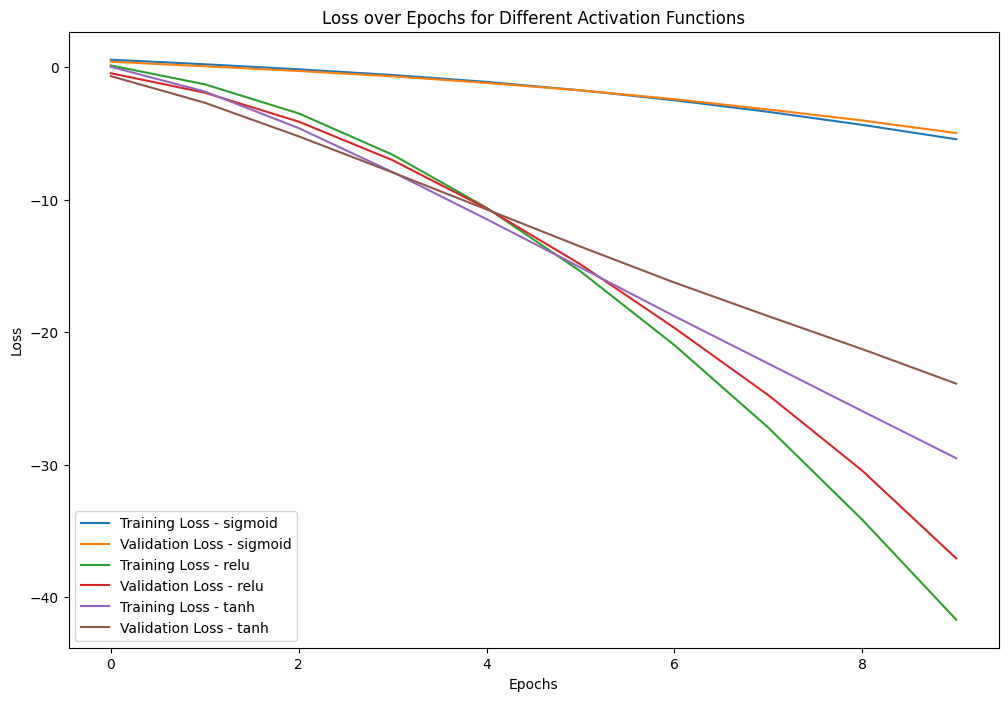

In [49]:
plt.figure(figsize=(12, 8))

for activation in activations:
    plt.plot(history_dict[activation].history['loss'], label=f'Training Loss - {activation}')
    plt.plot(history_dict[activation].history['val_loss'], label=f'Validation Loss - {activation}')

plt.title('Loss over Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting for accuracy over epochs

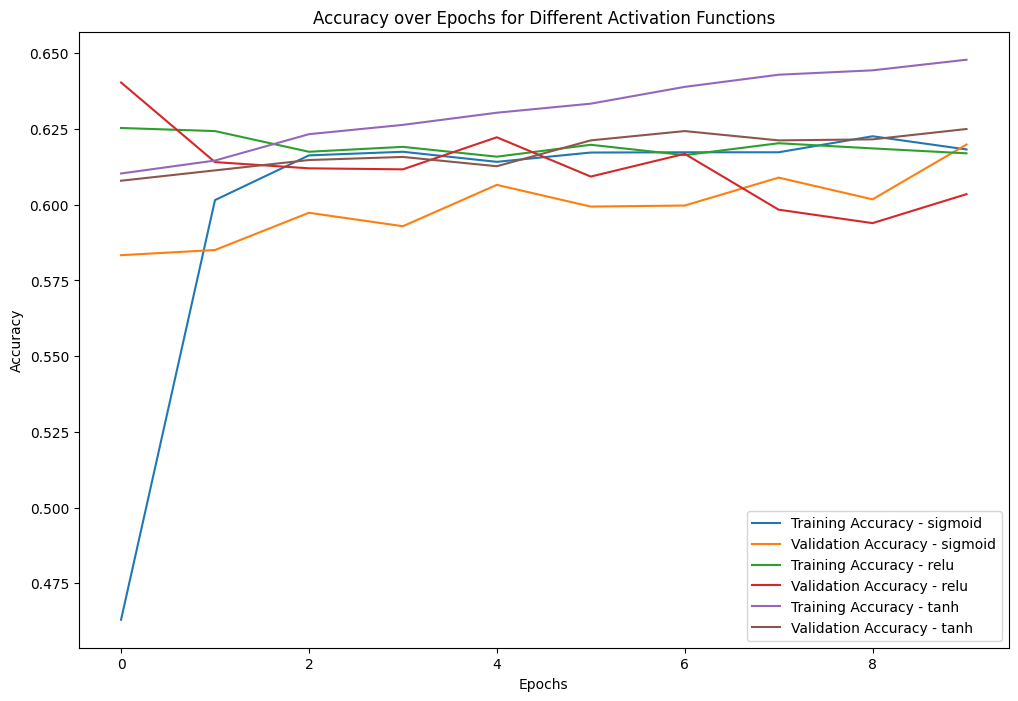

In [50]:
plt.figure(figsize=(12, 8))

for activation in activations:
    plt.plot(history_dict[activation].history['accuracy'], label=f'Training Accuracy - {activation}')
    plt.plot(history_dict[activation].history['val_accuracy'], label=f'Validation Accuracy - {activation}')

plt.title('Accuracy over Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Classification report

In [51]:
for activation in activations:
    print(f"\nClassification Report for {activation} Activation:")
    y_pred = (history_dict[activation].model.predict(X_test) > 0.5).astype("int32")
    print(classification_report(y_test, y_pred))


Classification Report for sigmoid Activation:
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1889
           1       0.32      0.80      0.46       580
           2       0.00      0.00      0.00       459

    accuracy                           0.62      2928
   macro avg       0.41      0.51      0.42      2928
weighted avg       0.65      0.62      0.61      2928


Classification Report for relu Activation:
44/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1889
           1       0.32      0.83      0.46       580
           2       0.00      0.00      0.00       459

    accuracy                           0.60      2928
   macro avg       0.41      0.50      0.41      2928
weighted avg       0.65      0.60      0.59      2928


Classification Report for tanh Activation:
18/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1889
           1       0.32      0.79      0.46       580
           2       0.00      0.00      0.00       459

    accuracy                           0.62      2928
   macro avg       0.41      0.50      0.42      2928
weighted avg       0.65      0.62      0.61      2928



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
